# Week 11 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #P: Put value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)-S * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(230.38, 200, 1/12, 10, 0.0353)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month put with strike $ 200' ) 

0 3.207476639702809 9.868810955849773
1 0.8333111662445285 -52.012721371926496
2 0.8986902806376027 1.338197559041383
3 0.897884857392595 -0.016887158128341184
4 0.8978847515993946 -2.2175633773713344e-06
The implied volatility is 89.79 % for the one-month put with strike $ 200


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2024-12-06')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241206P00100000,2024-11-21 18:54:43+00:00,100.0,0.01,0.00,0.01,0.000000,0.000000,1.0,4,1.625002,False,REGULAR,USD
1,AAPL241206P00105000,2024-11-27 14:45:19+00:00,105.0,0.03,0.00,0.16,0.020000,200.000000,2.0,41,1.998047,False,REGULAR,USD
2,AAPL241206P00110000,2024-11-18 19:53:59+00:00,110.0,0.01,0.00,0.10,0.000000,0.000000,1227.0,1276,1.796876,False,REGULAR,USD
3,AAPL241206P00120000,2024-11-19 20:43:04+00:00,120.0,0.01,0.00,0.11,0.000000,0.000000,460.0,475,1.621096,False,REGULAR,USD
4,AAPL241206P00125000,2024-11-19 19:36:29+00:00,125.0,0.01,0.00,0.03,0.000000,0.000000,70.0,387,1.343753,False,REGULAR,USD
5,AAPL241206P00130000,2024-11-18 19:07:32+00:00,130.0,0.01,0.00,0.01,0.000000,0.000000,3.0,6,1.156254,False,REGULAR,USD
6,AAPL241206P00135000,2024-11-18 19:07:43+00:00,135.0,0.01,0.00,0.12,0.000000,0.000000,5.0,55,1.367191,False,REGULAR,USD
7,AAPL241206P00140000,2024-11-21 14:30:00+00:00,140.0,0.01,0.00,0.13,0.000000,0.000000,2.0,3,1.296879,False,REGULAR,USD
8,AAPL241206P00145000,2024-11-27 20:40:14+00:00,145.0,0.01,0.00,0.01,0.000000,0.000000,2.0,184,0.968750,False,REGULAR,USD
9,AAPL241206P00150000,2024-11-19 17:28:30+00:00,150.0,0.02,0.00,0.02,0.000000,0.000000,97.0,104,0.953125,False,REGULAR,USD


In [5]:
import mibian

In [9]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.BS([230.38, opt.puts.strike[i], 3.53, 10], putPrice = opt.puts.lastPrice[i])
    impliedvol[i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile/Skew')

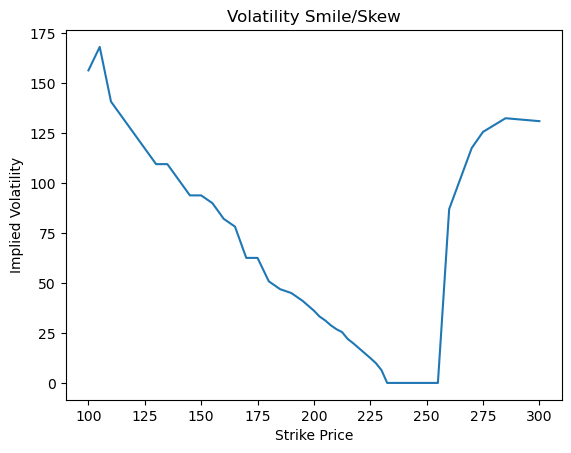

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile/Skew')

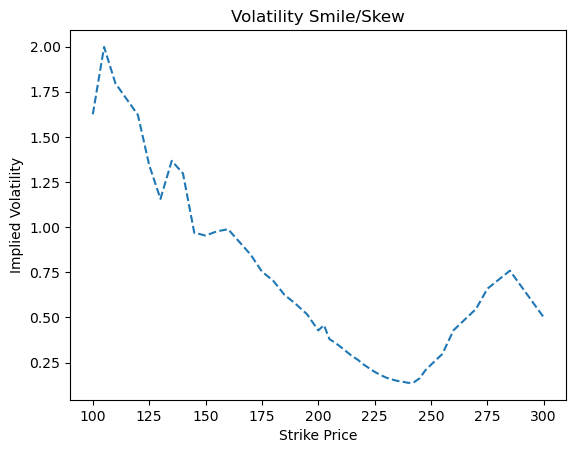

In [11]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 5

In [12]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile/Skew')

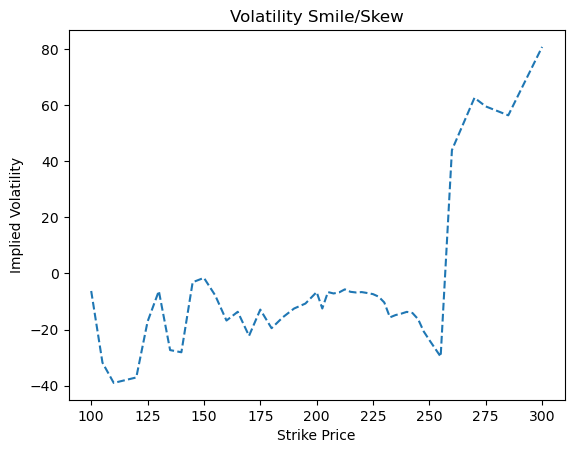

In [13]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 6

In [80]:
import arrow
T =['2024-11-29', '2024-12-06', '2024-12-13', '2024-12-20']


In [81]:
 opt.puts
    

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241213P00100000,2024-11-19 20:51:02+00:00,100.0,0.01,0.00,0.01,0.000000,0.000000,NaN,91,1.250004,False,REGULAR,USD
1,AAPL241213P00105000,2024-11-12 18:18:34+00:00,105.0,0.01,0.00,0.01,0.000000,0.000000,NaN,1,1.156254,False,REGULAR,USD
2,AAPL241213P00120000,2024-11-14 16:42:45+00:00,120.0,0.03,0.00,0.01,0.000000,0.000000,NaN,3,0.968750,False,REGULAR,USD
3,AAPL241213P00135000,2024-11-15 18:59:24+00:00,135.0,0.05,0.00,0.02,0.000000,0.000000,NaN,2,0.859376,False,REGULAR,USD
4,AAPL241213P00140000,2024-11-19 15:15:31+00:00,140.0,0.04,0.00,0.02,0.000000,0.000000,1.0,1,0.812502,False,REGULAR,USD
5,AAPL241213P00145000,2024-11-20 16:13:11+00:00,145.0,0.03,0.00,0.02,0.000000,0.000000,3.0,2757,0.765627,False,REGULAR,USD
6,AAPL241213P00150000,2024-11-26 18:42:44+00:00,150.0,0.02,0.00,0.02,0.000000,0.000000,1.0,131,0.710940,False,REGULAR,USD
7,AAPL241213P00155000,2024-11-25 16:44:03+00:00,155.0,0.04,0.00,0.02,0.000000,0.000000,13.0,25,0.656253,False,REGULAR,USD
8,AAPL241213P00160000,2024-11-27 16:33:43+00:00,160.0,0.03,0.00,0.03,0.010000,50.000000,231.0,175,0.640629,False,REGULAR,USD
9,AAPL241213P00165000,2024-11-27 15:49:31+00:00,165.0,0.02,0.00,0.03,0.000000,0.000000,10.0,68,0.589848,False,REGULAR,USD


In [82]:
K =  opt.puts.strike.iloc[12:15]
K
T

['2024-11-29', '2024-12-06', '2024-12-13', '2024-12-20']

In [83]:
now = arrow.get('2024-11-25')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s[i,j] = opt.puts.impliedVolatility[opt.puts.strike == K.iloc[i]].values[0]

In [84]:
opt.puts.impliedVolatility[opt.puts.strike == K.iloc[0]].values[0]
impliedvol_s

array([[1.15625422, 0.70312797, 0.50391121, 0.44922426],
       [1.06250469, 0.62500375, 0.47852084, 0.42090423],
       [0.93750062, 0.57422301, 0.43945873, 0.38965454]])

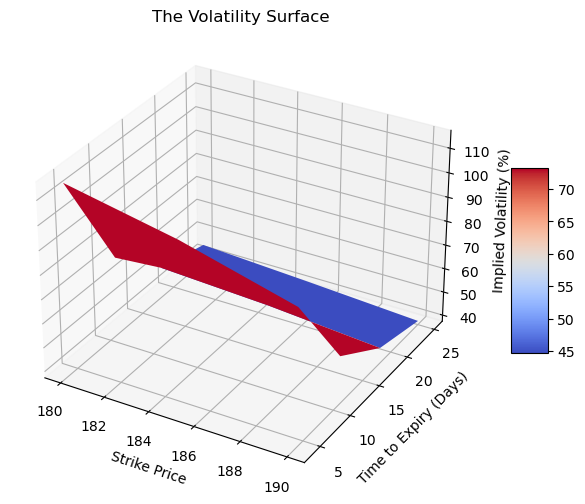

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.4, aspect=5);